In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import os
%matplotlib inline

In [2]:
files = [file for file in os.listdir('Resources/')]
print(files)

['aapl_historical.csv', 'algo_returns.csv', 'cost_historical.csv', 'goog_historical.csv', 'sp500_history.csv', 'whale_returns.csv']


In [3]:
sp500_historical = pd.read_csv('Resources/' + files[4], 
                               index_col='Date', 
                               parse_dates=True, 
                               infer_datetime_format=True).sort_index()

algo_returns = pd.read_csv('Resources/' + files[1], 
                           index_col='Date', 
                           parse_dates=True, 
                           infer_datetime_format=True).sort_index()
whale_returns = pd.read_csv('Resources/' + files[5], 
                            index_col='Date', 
                            parse_dates=True, 
                            infer_datetime_format=True).sort_index()

# My portfolio


In [4]:
files = [file for file in os.listdir('Custom_Portfolio/')]
axp_df = pd.read_csv('Custom_Portfolio/' + files[0], 
                               index_col='Date', 
                               parse_dates=True, 
                               infer_datetime_format=True).sort_index()

chgg_df = pd.read_csv('Custom_Portfolio/' + files[1], 
                           index_col='Date', 
                           parse_dates=True, 
                           infer_datetime_format=True).sort_index()
ea_df = pd.read_csv('Custom_Portfolio/' + files[2], 
                            index_col='Date', 
                            parse_dates=True, 
                            infer_datetime_format=True).sort_index()

pgr_df = pd.read_csv('Custom_Portfolio/' + files[3], 
                            index_col='Date', 
                            parse_dates=True, 
                            infer_datetime_format=True).sort_index()

spyg_df = pd.read_csv('Custom_Portfolio/' + files[5], 
                            index_col='Date', 
                            parse_dates=True, 
                            infer_datetime_format=True).sort_index()

In [5]:
portfolio_df = pd.DataFrame(pd.concat([axp_df,chgg_df,ea_df,pgr_df,spyg_df], axis = 'columns', join = 'inner'))
portfolio_df.columns = ['AXP','CHGG','EA','PGR','SPYG']

portfolio_returns = portfolio_df.pct_change().dropna()
portfolio_returns.head()

,AXP,CHGG,EA,PGR,SPYG
Date,,,,,
2015-03-03,-0.001463,-0.001218,-0.013577,-0.011074,-0.005518
2015-03-04,-0.015627,0.067073,0.009352,-0.013811,-0.003964
2015-03-05,0.006449,-0.024000,0.003147,0.004542,0.001990
2015-03-06,-0.010351,-0.028103,-0.017776,-0.010550,-0.014694
2015-03-09,0.002490,-0.007229,0.005500,0.005712,0.004837


In [6]:
weights = [0.2,0.2,0.2,0.2,0.2]

my_weighted_returns = pd.DataFrame(portfolio_returns.dot(weights))
my_weighted_returns.columns = ['My Portfolio']
my_weighted_returns.head()

,My Portfolio
Date,
2015-03-03,-0.006570
2015-03-04,0.008605
2015-03-05,-0.001574
2015-03-06,-0.016295
2015-03-09,0.002262


In [7]:
print(whale_returns)
print(whale_returns.isna().sum())
whale_returns.dropna(inplace = True)
print(whale_returns.isna().sum())

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-

In [8]:
print(algo_returns)
print(algo_returns.isna().sum())
algo_returns.dropna(inplace = True)
print(algo_returns.isna().sum())

              Algo 1    Algo 2
Date                          
2014-05-28  0.001745       NaN
2014-05-29  0.003978       NaN
2014-05-30  0.004464       NaN
2014-06-02  0.005692       NaN
2014-06-03  0.005292       NaN
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1241 rows x 2 columns]
Algo 1    0
Algo 2    6
dtype: int64
Algo 1    0
Algo 2    0
dtype: int64


In [9]:
print(sp500_historical)
print(sp500_historical.isna().sum())
sp500_historical.dropna(inplace = True)
print(sp500_historical.isna().sum())

print(sp500_historical.head())

               Close
Date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99
2012-10-04  $1461.40
2012-10-05  $1460.93
...              ...
2019-04-16  $2907.06
2019-04-17  $2900.45
2019-04-18  $2905.03
2019-04-22  $2907.97
2019-04-23  $2933.68

[1649 rows x 1 columns]
Close    0
dtype: int64
Close    0
dtype: int64
               Close
Date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99
2012-10-04  $1461.40
2012-10-05  $1460.93


In [10]:
sp500_historical= sp500_historical.apply(lambda x: x.str.replace('$','').apply(lambda x: float(x))).dropna()
print(sp500_historical.head())

              Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93


In [11]:
sp500_returns = sp500_historical.pct_change().dropna()
sp500_returns.columns = ['SP500 Returns']
print(sp500_returns)

            SP500 Returns
Date                     
2012-10-02       0.000872
2012-10-03       0.003624
2012-10-04       0.007174
2012-10-05      -0.000322
2012-10-08      -0.003457
...                   ...
2019-04-16       0.000509
2019-04-17      -0.002274
2019-04-18       0.001579
2019-04-22       0.001012
2019-04-23       0.008841

[1648 rows x 1 columns]


In [12]:
combined_return_df = pd.concat([sp500_returns,whale_returns,algo_returns,my_weighted_returns], 
                               axis = 'columns',
                               join = 'inner')
combined_return_df.dropna(inplace = True)
combined_return_df.tail()


,SP500 Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,My Portfolio
Date,,,,,,,,
2019-04-16,0.000509,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.007540
2019-04-17,-0.002274,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.010739
2019-04-18,0.001579,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.004339
2019-04-22,0.001012,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.002642
2019-04-23,0.008841,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.016602


### Defining a function that will automate some of the repetitiveness of plotting a graph

In [13]:
def graph(title,xlabel,ylabel):
    title = plt.title(title)
    xlabel = plt.xlabel(xlabel)
    ylabel = plt.ylabel(ylabel)
    return title, xlabel,ylabel

# Daily Returns
---
* This isn't all too helpful by itself as they are all pretty much the same. However, there will be more information that will make this information more useful.

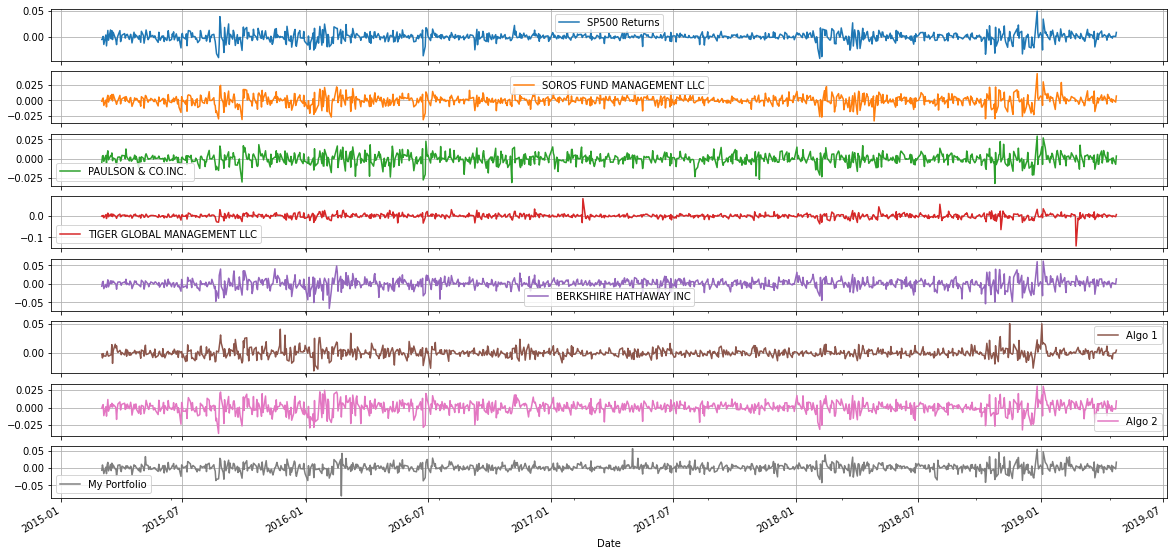

In [14]:
combined_return_df.plot(figsize = (20,10),
                        subplots = True,
                        grid = True)
plt.legend(loc ='lower left')

# Cumulative Returns
---

## Analysis
---
* #### When calculating the cumulative returns of the portfolios it is clear which one outperformed the others: Algo 1
* #### The underperformer is also easily spotted: Paulson

(Text(0.5, 1.0, 'Cumulative Returns as Percents % of All Portfolios'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Cumulative Returns as Percents %'))

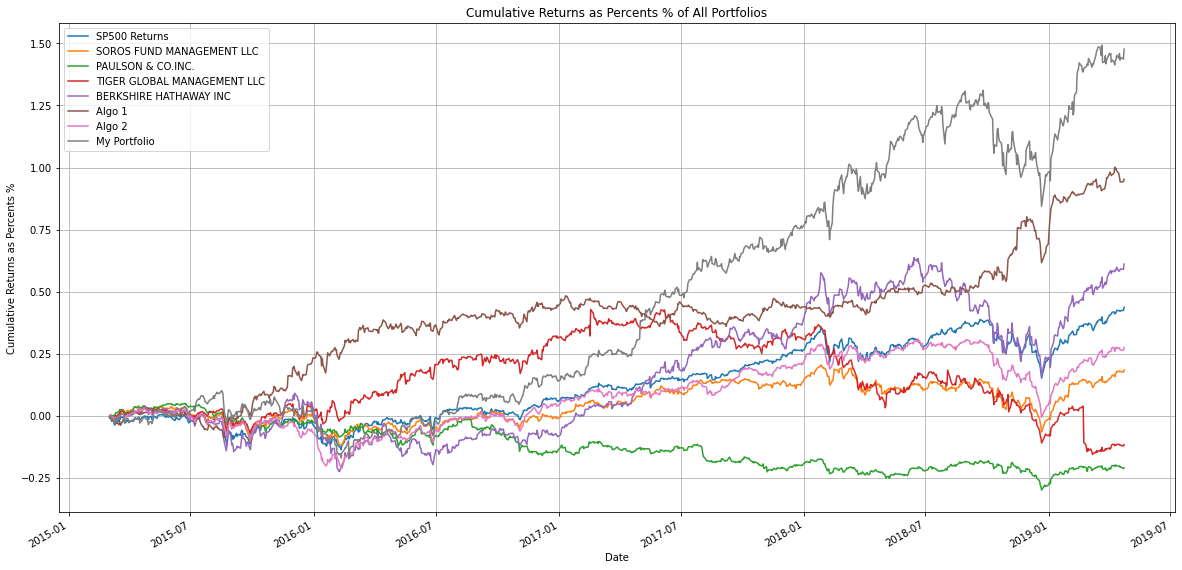

In [15]:
combined_cumulative_returns = ((1 + combined_return_df).cumprod() - 1)
combined_cumulative_returns.plot(figsize = (20,10),grid =True)
graph('Cumulative Returns as Percents % of All Portfolios','Date','Cumulative Returns as Percents %')

# Boxplot/Risk
---

## Analysis
---
### Using the boxplot, a first glimpse of the risk/volatility in the portfolio can be visualized.
* The riskiest portfolio with the widest swings is Tiger
* The most consistent was Paulson.

### With the two graphs shown show us some interesting developments:
* The riskiest portfolio did not outperform all other portfolios: Tiger
* The least risky portfolio happened to make consistently bad returns: Paulson

(Text(0.5, 1.0, 'Returns as Percents % of All Portfolios'),
 Text(0.5, 69.0, ' Returns as Percents'),
 Text(138.375, 0.5, 'Portfolios'))

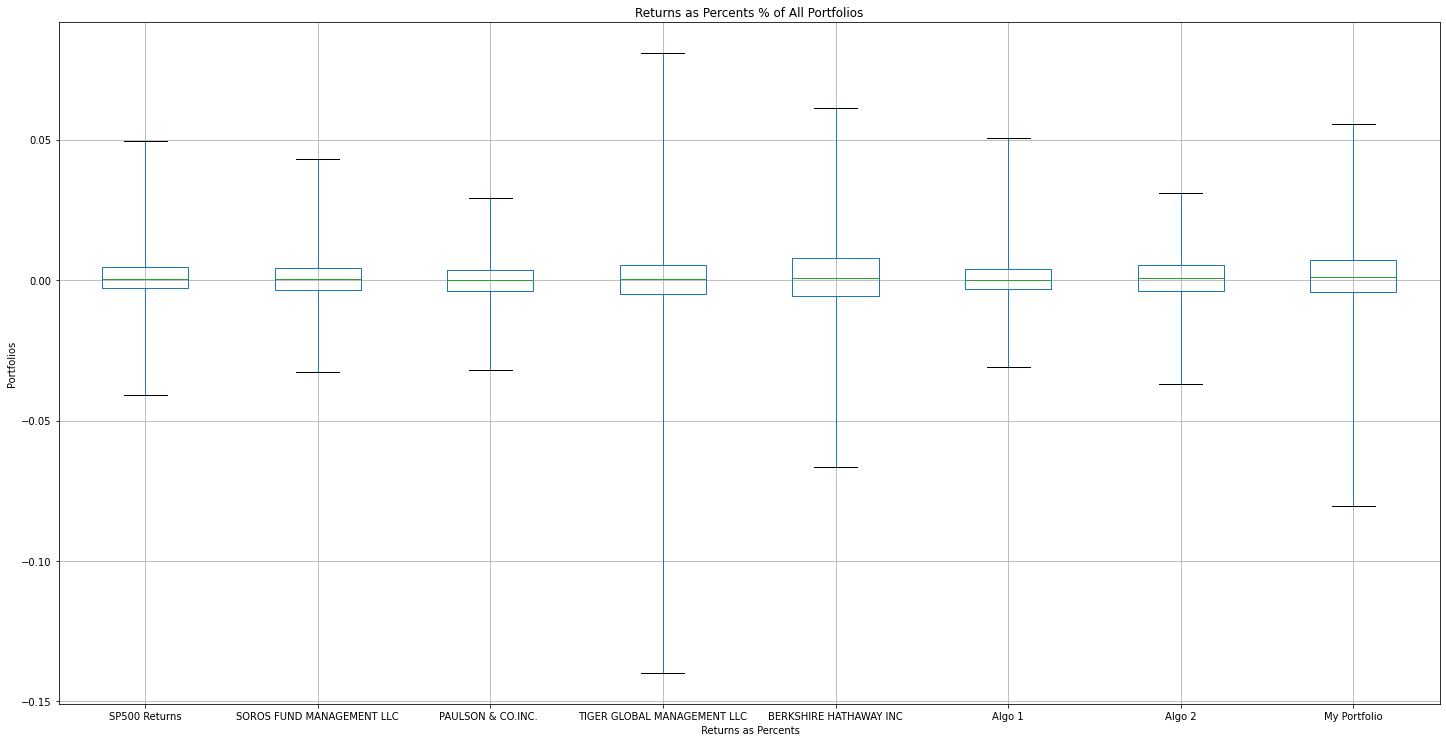

In [16]:
combined_return_df.boxplot(figsize=(20,10), grid = True, whis = [0,100])
plt.tight_layout()
graph('Returns as Percents % of All Portfolios',' Returns as Percents', 'Portfolios')

# Standard Deviation/Risk
---
Standard deviation essentially shows us how volatile/wild the stock prices were over a period of time. The daily standard deviation was calculated below, but normally those would be converted into annualize percentages.

## Analysis
---
### Verifying our graphs with numbers.
* The portfolio with the highest standard deviation happened to be the one with the widest whisker spread: Tiger
* The most consistent portfolio happend to be the one with the most narrow whisker spread: Paulson
### These numbers check out and our initial assumtion from the two first graphs is correct.
### The next graph visually represents the annualized standard deviation for easier comparison.

In [17]:
combined_daily_std = combined_return_df.std()
combined_daily_std.head()

SP500 Returns                  0.008523
SOROS FUND MANAGEMENT LLC      0.007888
PAULSON & CO.INC.              0.007027
TIGER GLOBAL MANAGEMENT LLC    0.010877
BERKSHIRE HATHAWAY INC         0.012922
dtype: float64

In [18]:
sp500_daily_std = combined_daily_std.iloc[0]
sp500_daily_std

0.008523183294381318

# Benchmarking Risk with the SP500
---
The SP500 is generally used as the benchmark to compare the returns of any investor. 

## Analysis
---
### Which Portfolios had more consistend/less risky returns than the SP500?
* The code below tells us that the portfolios with more consistent and less risky returns than the SP500 were Soros, Paulson, Algo 1, and Algo 2
* The portfolios with more volatile and risky returns are Tiger and Berkshire.

In [19]:
riskier_portfolios = []
less_risky_portfolio = []
for i in combined_daily_std.index:
    Portfolio = i
    std = combined_daily_std[i]
    SP500 = combined_daily_std[0]
    if std > SP500:
        riskier_portfolios.append([Portfolio])
    elif std == SP500:
        pass
    elif std < SP500:
        less_risky_portfolio.append(Portfolio)

In [20]:
print(f'The following Portfolios have returns that are less risky and more consistent than the SP500: \n\n '
      f'{less_risky_portfolio}')

The following Portfolios have returns that are less risky and more consistent than the SP500: 

 ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'Algo 1', 'Algo 2']


In [21]:
print(f'The following Portfolios have returns that are riskier and more volatile than the SP500: \n\n'
     f'{riskier_portfolios}')

The following Portfolios have returns that are riskier and more volatile than the SP500: 

[['TIGER GLOBAL MANAGEMENT LLC'], ['BERKSHIRE HATHAWAY INC'], ['My Portfolio']]


# Annualized Standard Deviation
---
Annualized Standard Deviation is normally used, because it allows for an investor to more accurately interpret the numbers as investments are usually compared with each other on an annual basis.

Compare this graph below with the boxplot above. You will find they mirror each other in the results they display.

SP500 Returns                  0.135301
SOROS FUND MANAGEMENT LLC      0.125212
PAULSON & CO.INC.              0.111554
TIGER GLOBAL MANAGEMENT LLC    0.172663
BERKSHIRE HATHAWAY INC         0.205124
Algo 1                         0.121145
Algo 2                         0.132445
My Portfolio                   0.181492
dtype: float64


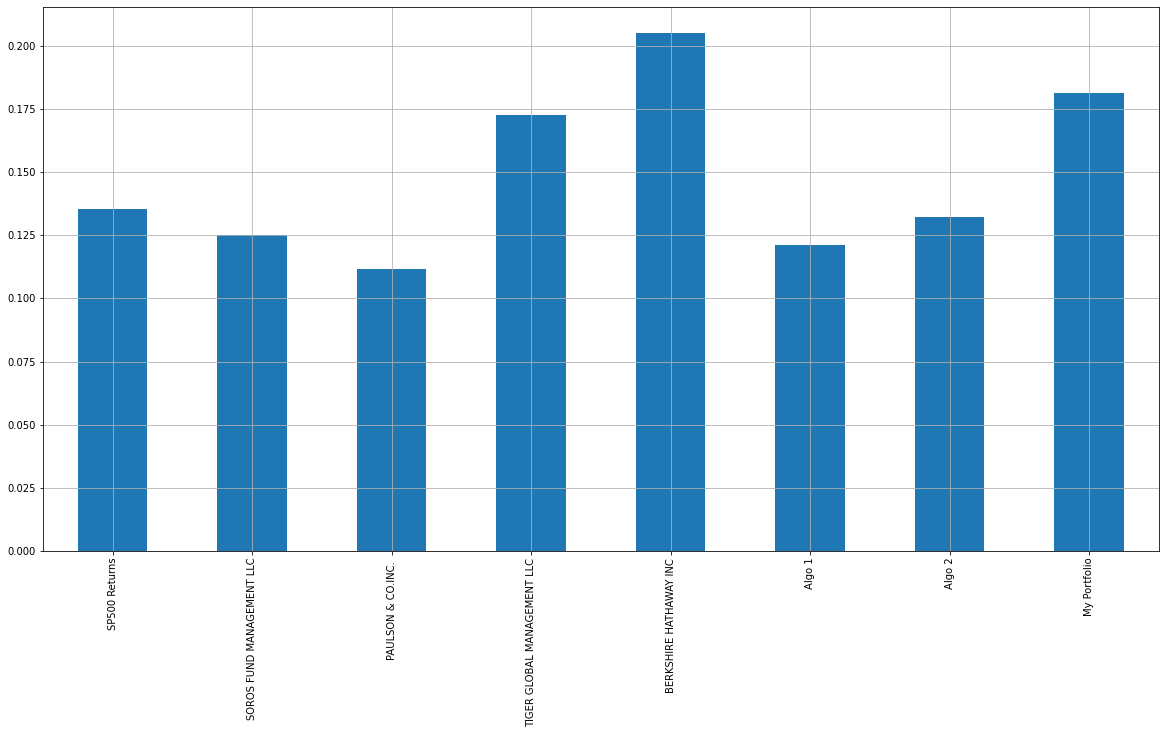

In [22]:
combined_annualized_std = combined_daily_std * np.sqrt(252)
combined_annualized_std.plot(kind = 'bar',figsize = (20,10), grid = True)
print(combined_annualized_std)

# 21-Day Rolling Standard Deviation
---

This is used to filter out the day to day noise and give us more general risk trends.

## Analysis
---
This graph is interesting, because it shows us what no other graph thus far has. It shows us the fact that for a large portion of the time, Bershire tends to have a higher standard deviation/risk on returns. However, because of the intensity of Tiger's spikes, Tiger is shown to have the highest standard deviation/risk on return overall.

(Text(0.5, 1.0, '21-Day Rolling Standard Deviation of Returns in Percents of  All Portfolios'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Standard Deviation of Returns'))

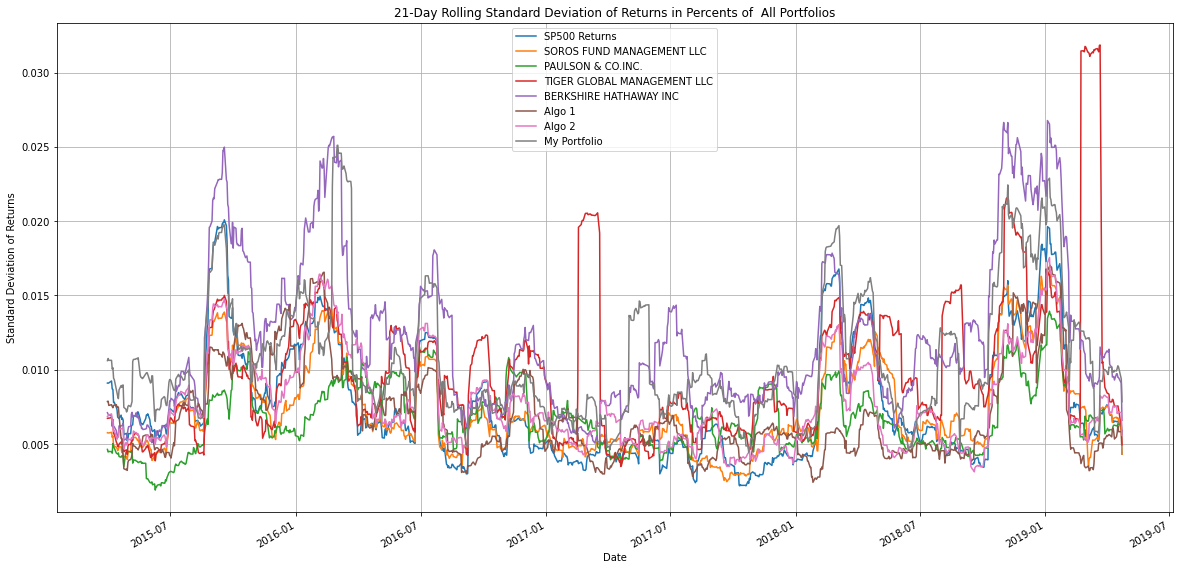

In [23]:
rolling_std_21 = combined_return_df.rolling(window = 21).std()
rolling_std_21.plot(figsize = (20,10),grid = True)
graph('21-Day Rolling Standard Deviation of Returns in Percents of  All Portfolios','Date','Standard Deviation of Returns')

# Correlation
---

The heatmap below shows the correlation between each portfolios' returns and the sp500's.The correlation shows us if there is a relationship between each portfolio's returns and the market's, but not the degree that relationship impacts the portfolios returns.

## Analysis
---
* We can see that the portfolio with the highest correlation with the sp500 is the Soros Fund. This in turn tells us that if the investor were to desire a portfolio that would allow for the maximum diversification, Soros's Fund would not be the one to choose.
* The company whose returns have the lowest correlation with the sp500's is Algo 1. The inverse of above would be true for Algo 1. An investor wanting diversification should choose to invest in this portfolio.
* Later, we will take a look at the beta, which shows us to what degree each portfolio's returns change in relation to the market's.

<AxesSubplot:>

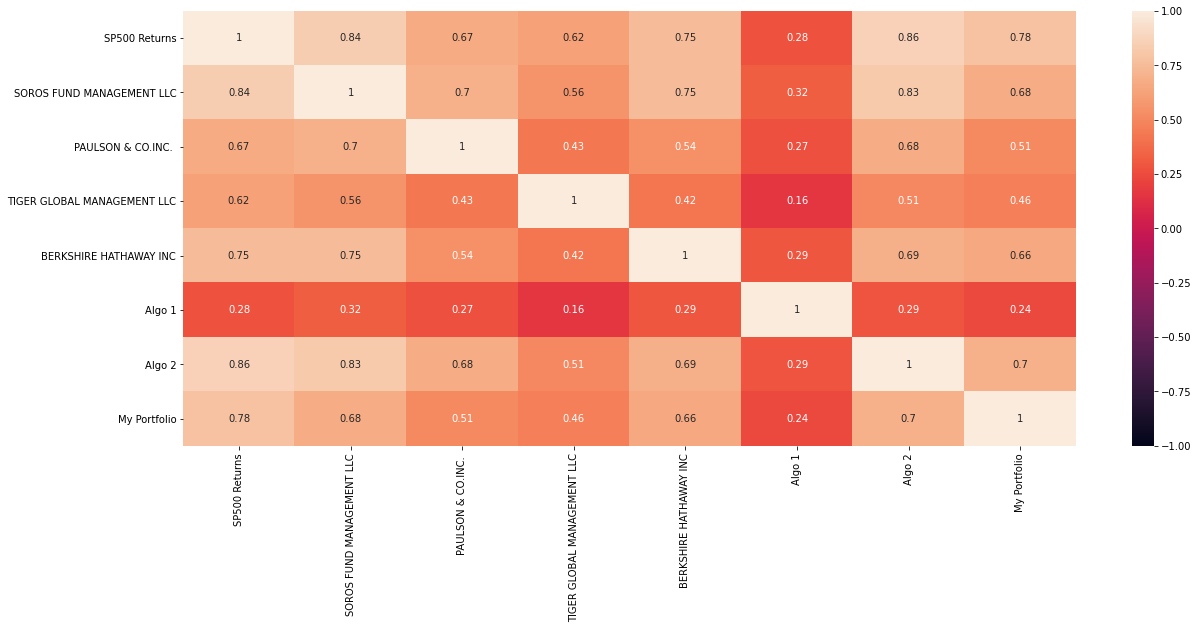

In [24]:
correlation = combined_return_df.corr()
a4_dims = (20, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(correlation,vmax = -1, vmin = 1, annot = True)

In [25]:
sp500 = combined_return_df.iloc[:,0]
soros_fund = combined_return_df.iloc[:,1]
paulson_fund = combined_return_df.iloc[:,2]
tiger_fund = combined_return_df.iloc[:,3]
berkshire_fund = combined_return_df.iloc[:,4]
algo1_fund = combined_return_df.iloc[:,5]
algo2_fund = combined_return_df.iloc[:,6]
my_portfolio = combined_return_df.iloc[:,7]

# Beta
---
## Beta, unlike correlation, tells us to what extent we can expect a stock/portfolio to move in relation to every percent the market moves. 
* This is a good thing to know. If the investor is in a bull market and expects the market to continue to go up, a high beta (e.g. 2) would imply that for every percent up the market goes, the investor's portfolio is expected to increase by twice that.
* However, if the investor expected a bear market, they would be wise to reduce their portfolio's beta (or invest in a portfolio with a lower beta) as the same portfolio described above is expected to decrease at twice the rate of the market.

In [26]:
def beta(fund, index):
    variance = index.var()
    covariance = fund.cov(index)
    beta = covariance / variance
    return beta

In [27]:
soros_beta = beta(soros_fund,sp500)
print(soros_beta)

0.7750766009931886


In [28]:
paulson_beta = beta(paulson_fund,sp500)
print(paulson_beta)

0.5515900283961096


In [29]:
tiger_beta = beta(tiger_fund,sp500)
print(tiger_beta)

0.7930079588981563


In [30]:
berkshire_beta = beta(berkshire_fund,sp500)
print(berkshire_beta)

1.1383416770802828


In [31]:
algo1_beta = beta(algo1_fund,sp500)
print(algo1_beta)

0.24953155883323194


In [32]:
algo2_beta = beta(algo2_fund,sp500)
print(algo2_beta)

0.8416993579062109


In [33]:
my_beta = beta(my_portfolio,sp500)
print(my_beta)

1.0509243114799471


## Analysis
---
* As can be seen from the graph below, the company with the highest Beta is actually Berkshire. The portfolio with the lowest Beta is Algo 1.
* Since Berkshire has the highest Beta, it could be assumed that it's returns were directly related to the returns of the market. If the market was doing well, then Berkshire was doing well.
* Since Algo 1's portfolio had the lowest beta, the opposite could be said. This portfolios returns were less direclty related to the market.

                                Betas
SOROS FUND MANAGEMENT LLC    0.775077
PAULSON & CO.INC.            0.551590
TIGER GLOBAL MANAGEMENT LLC  0.793008
BERKSHIRE HATHAWAY INC       1.138342
Algo 1                       0.249532
Algo 2                       0.841699
My Portfolio                 1.050924


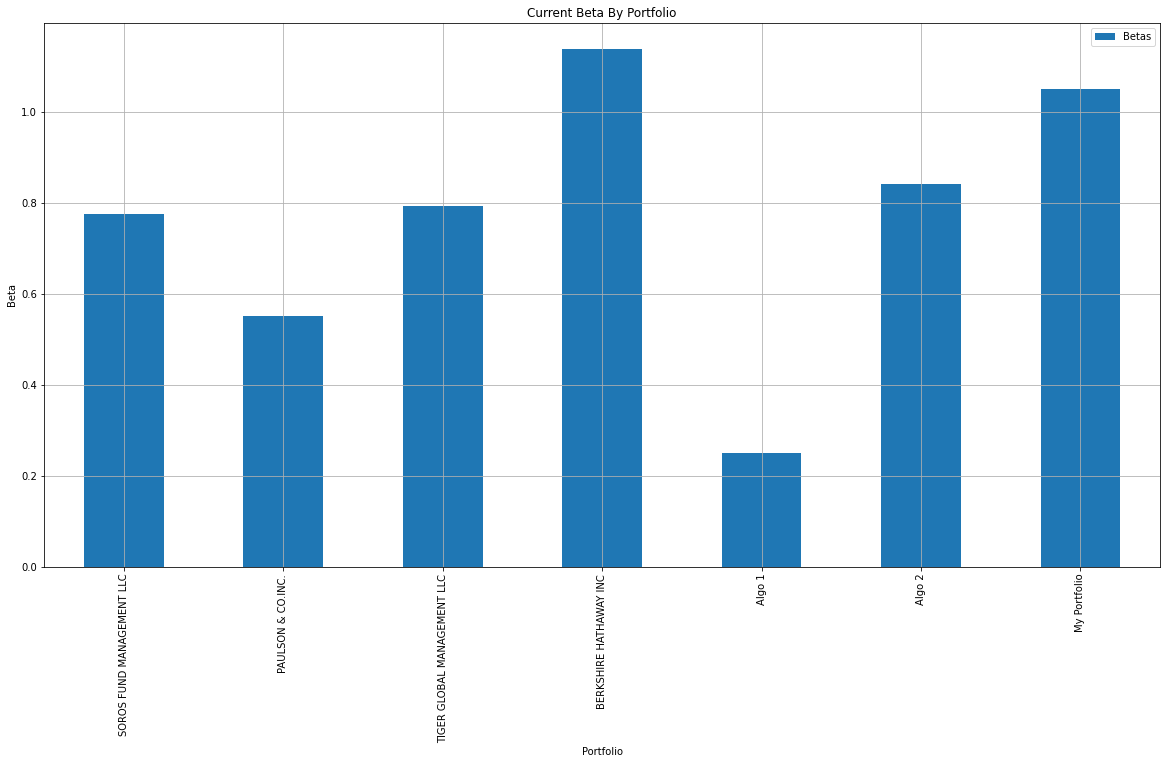

In [34]:
all_single_point_betas = pd.DataFrame([soros_beta,paulson_beta,
                                       tiger_beta,berkshire_beta,
                                       algo1_beta,algo2_beta,my_beta], 
                                      
                                      index = ['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC.',
                                               'TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC',
                                               'Algo 1', 'Algo 2','My Portfolio'],
                                     columns = ['Betas'])

all_single_point_betas.plot(kind = 'bar',
                            grid = True,
                            figsize = (20,10))

graph('Current Beta By Portfolio','Portfolio','Beta')
print(all_single_point_betas)

# 21-Day Rolling Beta
---
* Just like with a rolling standard deviation, the rolling beta is used to reduce the day to day noice produced by the actual day to day betas. 
* By smoothing out the betas with a rolling average, we can get rid of the day to day noise and see a general trend.

In [35]:
# algo1_beta = algo_returns['Algo 1'].rolling(window = 21).cov(sp500_returns['SP500 Returns']) / sp500_returns.rolling(window = 21).var()
# algo1_beta.plot(kind = 'scatter', x = sp500_returns.rolling(window = 21).var(), y = algo_returns['Algo 1'].rolling(window = 21).cov(sp500_returns['SP500 Returns']))

In [36]:
def rollingBeta(portfolio_returns,sp500_returns,window):
    portfolio_covariance = portfolio_returns.rolling(window = window).cov(sp500_returns)
    sp500_rolling_variance = sp500_returns.rolling(window = window).var()
    beta = portfolio_covariance / sp500_rolling_variance
    return beta.dropna()

In [37]:
algo1_rolling_beta = rollingBeta(algo1_fund,sp500,60)
algo1_rolling_beta

Date
2015-05-27    0.164082
2015-05-28    0.160533
2015-05-29    0.150781
2015-06-01    0.146808
2015-06-02    0.127359
                ...   
2019-04-16    0.025920
2019-04-17    0.072232
2019-04-18    0.069934
2019-04-22    0.069525
2019-04-23    0.084337
Length: 980, dtype: float64

In [38]:
algo2_rolling_beta = rollingBeta(algo2_fund,sp500,60)
algo2_rolling_beta

Date
2015-05-27    0.706504
2015-05-28    0.708746
2015-05-29    0.718590
2015-06-01    0.716991
2015-06-02    0.709360
                ...   
2019-04-16    0.910622
2019-04-17    0.923897
2019-04-18    0.925305
2019-04-22    0.926647
2019-04-23    0.922600
Length: 980, dtype: float64

In [39]:
soros_rolling_beta = rollingBeta(soros_fund,sp500,60)
soros_rolling_beta

Date
2015-05-27    0.587678
2015-05-28    0.589662
2015-05-29    0.592375
2015-06-01    0.591645
2015-06-02    0.590608
                ...   
2019-04-16    0.840772
2019-04-17    0.822868
2019-04-18    0.823598
2019-04-22    0.825137
2019-04-23    0.806330
Length: 980, dtype: float64

In [40]:
paulson_rolling_beta = rollingBeta(paulson_fund,sp500,60)
paulson_rolling_beta

Date
2015-05-27    0.365486
2015-05-28    0.359158
2015-05-29    0.361828
2015-06-01    0.359795
2015-06-02    0.363764
                ...   
2019-04-16    0.612348
2019-04-17    0.600559
2019-04-18    0.600784
2019-04-22    0.603598
2019-04-23    0.580211
Length: 980, dtype: float64

In [41]:
tiger_rolling_beta = rollingBeta(tiger_fund,sp500,60)
tiger_rolling_beta

Date
2015-05-27    0.686327
2015-05-28    0.690174
2015-05-29    0.692355
2015-06-01    0.691368
2015-06-02    0.697001
                ...   
2019-04-16    0.386909
2019-04-17    0.383682
2019-04-18    0.383226
2019-04-22    0.383434
2019-04-23    0.380797
Length: 980, dtype: float64

In [42]:
berkshire_rolling_beta = rollingBeta(berkshire_fund,sp500,60)
berkshire_rolling_beta

Date
2015-05-27    0.652798
2015-05-28    0.650503
2015-05-29    0.663826
2015-06-01    0.662655
2015-06-02    0.642690
                ...   
2019-04-16    1.337986
2019-04-17    1.301791
2019-04-18    1.302226
2019-04-22    1.304125
2019-04-23    1.278284
Length: 980, dtype: float64

In [61]:
my_rolling_beta = rollingBeta(my_portfolio,sp500,60)

In [62]:
all_rolling_betas = pd.concat([soros_rolling_beta,
                               paulson_rolling_beta,
                               tiger_rolling_beta,
                               berkshire_rolling_beta, 
                               algo1_rolling_beta, 
                               algo2_rolling_beta,
                               my_rolling_beta],
                              axis = 'columns',
                              join = 'inner')
all_rolling_betas.columns = ['Soros','Paulson','Tiger','Berkshire','Algo 1',' Algo 2','My Portfolio']
all_rolling_betas

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,My Portfolio
Date,,,,,,,
2015-05-27,0.587678,0.365486,0.686327,0.652798,0.164082,0.706504,0.974111
2015-05-28,0.589662,0.359158,0.690174,0.650503,0.160533,0.708746,0.970771
2015-05-29,0.592375,0.361828,0.692355,0.663826,0.150781,0.718590,0.995058
2015-06-01,0.591645,0.359795,0.691368,0.662655,0.146808,0.716991,0.994590
2015-06-02,0.590608,0.363764,0.697001,0.642690,0.127359,0.709360,0.980249
...,...,...,...,...,...,...,...
2019-04-16,0.840772,0.612348,0.386909,1.337986,0.025920,0.910622,1.083859
2019-04-17,0.822868,0.600559,0.383682,1.301791,0.072232,0.923897,1.109745
2019-04-18,0.823598,0.600784,0.383226,1.302226,0.069934,0.925305,1.109501


(Text(0.5, 1.0, 'Rolling Beta By Portfolio'),
 Text(0.5, 0, 'Portfolios'),
 Text(0, 0.5, 'Betas'))

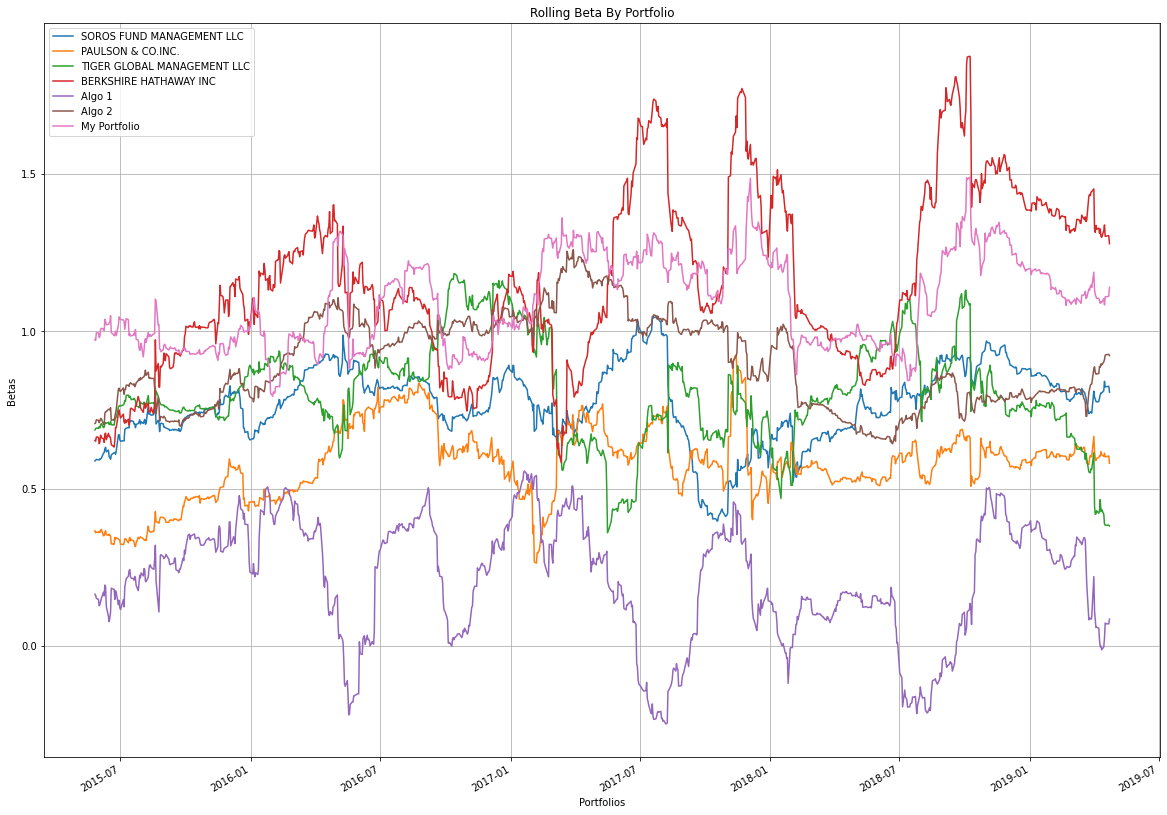

In [64]:
all_rolling_betas.columns = ['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC.','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1', 'Algo 2','My Portfolio']
all_rolling_betas.plot(figsize = (20,15), grid = True, subplots =False)
graph('Rolling Beta By Portfolio','Portfolios','Betas')

## Analysis
---
* According to this graph, the portfolio most impacted by market swings is Algo2.
* The company least impacted by the market was Soros.
* It is interesting to note that, just like with Berkshire and the rolling standard deviation, for most of the
* Using this form of risk measurement, we can see that the portfolio with the highest/lowest beta was Algo2/Soros and not Tiger/Paulson.
* This means that while Tiger has wider return spreads than Algo 2, they are not as much of a result of market swings.
* On the other hand, if you were to choose a portfolio from the bunch that was least impacted by market moves, you would choose Soros.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

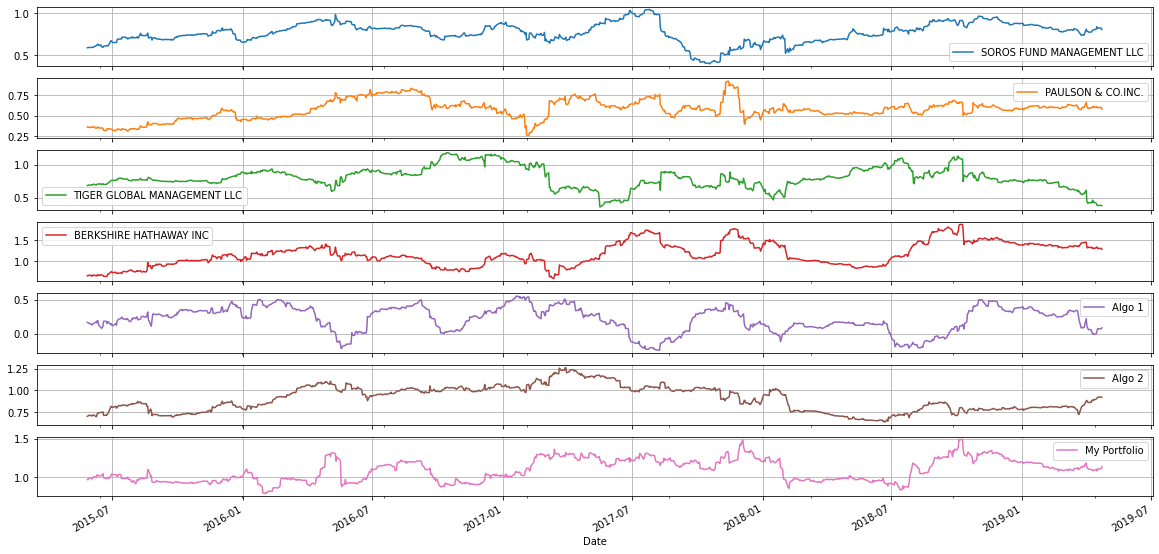

In [65]:
all_rolling_betas.plot(figsize = (20,10),grid = True, subplots = True)

(Text(0.5, 1.0, 'Soros EWM Return with a 21 day half life'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Percent Change'))

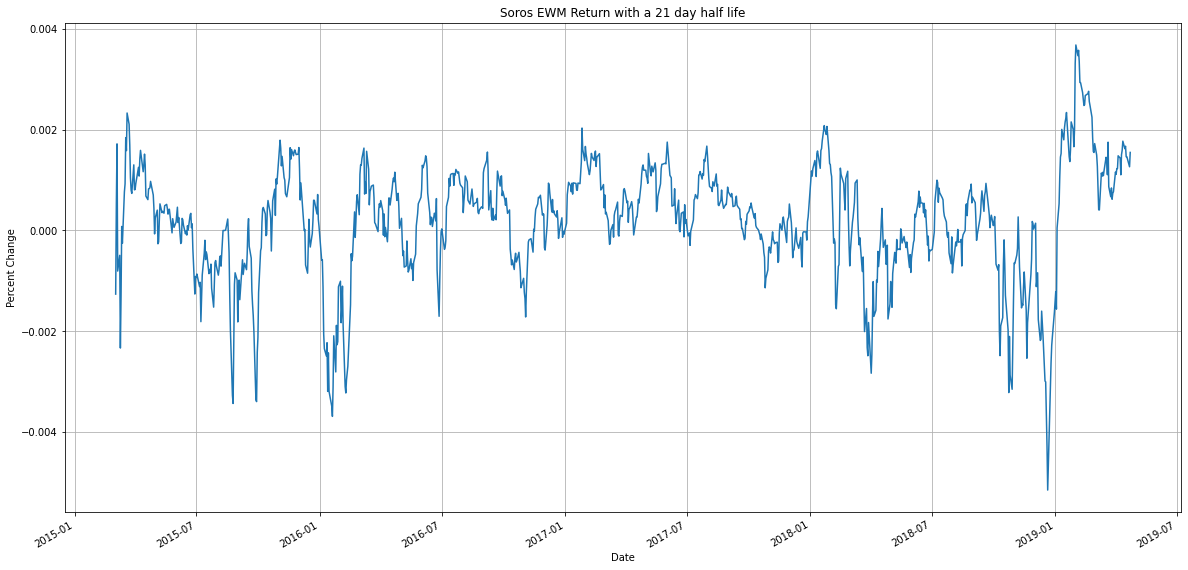

In [66]:
soros_ewm_returns= soros_fund.ewm(halflife='21 days', times = soros_fund.index).mean()
soros_ewm_returns.plot(figsize = (20,10), grid = True)
graph('Soros EWM Return with a 21 day half life','Date','Percent Change')

In [67]:
sharpe_ratios = (combined_return_df.mean() *252) / (combined_return_df.std() * np.sqrt(252))

(Text(0.5, 1.0, 'Sharpe Ratio by Portfolio'),
 Text(0.5, 0, 'Portfolio'),
 Text(0, 0.5, 'Sharpe Ratio'))

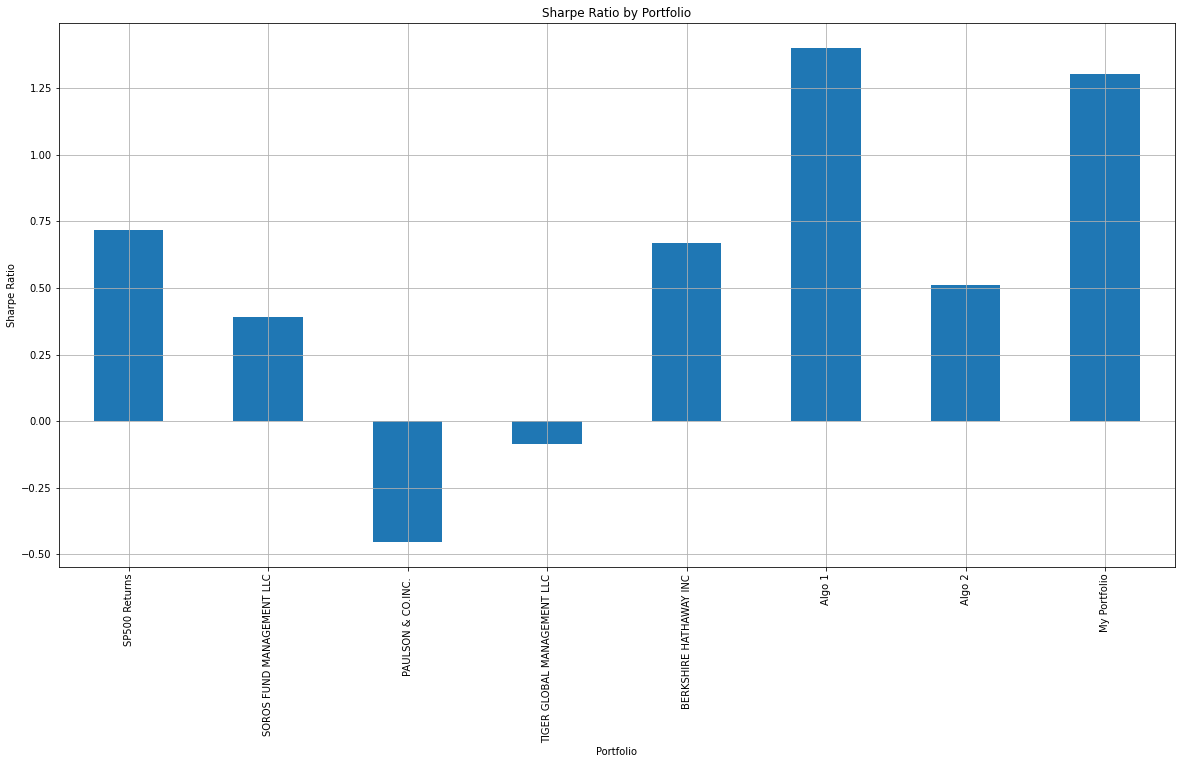

In [68]:
sharpe_ratios.plot(kind = 'bar', figsize = (20,10), grid = True)
graph('Sharpe Ratio by Portfolio','Portfolio','Sharpe Ratio')

In [69]:
print(f'\n\n SHARPE RATIOS: \n\n {sharpe_ratios}')



 SHARPE RATIOS: 

 SP500 Returns                  0.718630
SOROS FUND MANAGEMENT LLC      0.391166
PAULSON & CO.INC.             -0.453880
TIGER GLOBAL MANAGEMENT LLC   -0.085225
BERKSHIRE HATHAWAY INC         0.667043
Algo 1                         1.400810
Algo 2                         0.512276
My Portfolio                   1.303688
dtype: float64


In [70]:
better_than_SP500 = round(sharpe_ratios[sharpe_ratios > 0.6483],4)
print(f'\n\n The following portfolios had a betters sharpe ratio than the SP500 \n\n {better_than_SP500}')



 The following portfolios had a betters sharpe ratio than the SP500 

 SP500 Returns             0.7186
BERKSHIRE HATHAWAY INC    0.6670
Algo 1                    1.4008
My Portfolio              1.3037
dtype: float64


In [71]:
worse_than_SP500 = round(sharpe_ratios[sharpe_ratios < 0.648267],4)

print(f'\n\n The following portfolios had worse sharpe ratio than the SP500 \n\n {worse_than_SP500}')



 The following portfolios had worse sharpe ratio than the SP500 

 SOROS FUND MANAGEMENT LLC      0.3912
PAULSON & CO.INC.             -0.4539
TIGER GLOBAL MANAGEMENT LLC   -0.0852
Algo 2                         0.5123
dtype: float64


# Put in a summary here

## Use those bins. Concatinate bins from above here and summarize them with words

In [72]:
# Create a bin for annual returns


In [83]:
# Bin for compound returns
annualized_returns = combined_return_df.mean() * 252 *100
annualized_returns
bins = [-6,3,5,12,20,25]
bin_names = ['Very Low','Low','Moderate','High','Very High']
annualized_returns
annualized_returns = pd.DataFrame(annualized_returns.round(4))
annualized_returns.columns = ['Annual Returns']
annualized_returns['Return Rating'] = pd.cut(annualized_returns['Annual Returns'], bins, labels = bin_names)

In [84]:
annualized_std = pd.DataFrame(combined_annualized_std * 100)
annualized_std.columns = ['Annualized STD']

bins = [0,13,16,20,25]
bin_names = ['Low','Moderate','High','Very High']
annualized_std_rating = pd.cut(combined_annualized_std *100,bins, labels = bin_names)
annualized_std['Risk Rating'] = annualized_std_rating

In [85]:
sharpe = pd.DataFrame(sharpe_ratios)
sharpe.columns = ['Sharpe']

# Creating and implementing bins
bins = [-0.5,0.0,1,1.5,2,3]
bin_names = ['Very Low','Low','Moderate','High','Very High']
sharpe_ratings = pd.cut(sharpe['Sharpe'],bins, labels = bin_names)
sharpe['Sharpe Rating'] = sharpe_ratings

# Conclusion:
---
As can be seen in the sorted_portfolio below, which is sorted by the sharpe ratio, the best portfolio by far was Algo 1. Algo 1's Sharpe ratio was an impressive 1.38, which was more than doubled the nearest contender; Berkshire. In the markets these portfolios performed in, there is no question as to the Algo 1's dominance. 
## Returns
---
In terms of annualized returns, Algo 1 again had the highest amongst them all at 12.68% not so closely followed by Berkshire which sported a 12.75% Return. As the other portfolios didn't manage 
## Risk/STD
---
## Beta
---
## Sharpe
---

In [86]:
portfolio_ratings = pd.concat([annualized_returns,annualized_std,sharpe], axis = 'columns',join = 'inner')
sorted_portfolio = portfolio_ratings.sort_values(by = 'Sharpe', ascending = False)
sorted_portfolio

,Annual Returns,Return Rating,Annualized STD,Risk Rating,Sharpe,Sharpe Rating
Algo 1,16.9700,High,12.114454,Low,1.400810,Moderate
My Portfolio,23.6610,Very High,18.149248,High,1.303688,Moderate
SP500 Returns,9.7232,Moderate,13.530134,Moderate,0.718630,Low
BERKSHIRE HATHAWAY INC,13.6827,High,20.512402,Very High,0.667043,Low
Algo 2,6.7849,Moderate,13.244549,Moderate,0.512276,Low
SOROS FUND MANAGEMENT LLC,4.8978,Low,12.521150,Low,0.391166,Low
TIGER GLOBAL MANAGEMENT LLC,-1.4715,Very Low,17.266344,High,-0.085225,Very Low
PAULSON & CO.INC.,-5.0632,Very Low,11.155385,Low,-0.453880,Very Low
